In [4]:
# Styling notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("rise.css", "r").read()
    return HTML(styles)
css_styling()

<div style="font-size:2em; text-align:center; margin-top:30px; margin-bottom:20px">Data Science Academy 7</div>
<hr>
<br>

<div style="font-size:4em; text-align:center; margin-bottom:30px; color:#00746E"><b>ARIMA</b></div>

In [5]:
# Import packages
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

C:\Users\crystallwi.xiaujing\AppData\Local\Continuum\anaconda3\envs\env01\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [6]:
# Load dataset
df = read_csv('../input/demand_store_forecast/train.csv')
df = df[(df['store'] == 1) & (df['item'] == 1)] # item 1 in store 1
df = df.set_index('date')
df.index = pd.DatetimeIndex(df.index).to_period('D')
y = df['sales']
y_to_train = y.iloc[:(len(y)-365)]
y_to_test = y.iloc[(len(y)-365):] # last year for testing

## Walk forward validation

<a> <img src="https://miro.medium.com/max/875/1*1JVA5-KVizOuSh9uk8W2xQ.png" alt="walk" border="0" height="300"></a>


## How to build an ARIMA Model

<a> <img src= "https://www.analyticsvidhya.com/wp-content/uploads/2015/02/flowchart.png" width = 600> </a>

In [10]:
# evaluate an ARIMA model using a walk-forward validation
predictions = list()
history = [x for x in y_to_train]
history

[13,
 11,
 14,
 13,
 10,
 12,
 10,
 9,
 12,
 9,
 9,
 7,
 10,
 12,
 5,
 7,
 16,
 7,
 18,
 15,
 8,
 7,
 9,
 8,
 14,
 12,
 12,
 11,
 6,
 9,
 13,
 11,
 21,
 15,
 14,
 9,
 10,
 13,
 11,
 14,
 11,
 16,
 11,
 14,
 10,
 11,
 7,
 11,
 10,
 10,
 7,
 13,
 12,
 15,
 11,
 7,
 9,
 9,
 10,
 15,
 13,
 20,
 14,
 13,
 17,
 11,
 15,
 16,
 11,
 18,
 14,
 13,
 10,
 14,
 10,
 22,
 11,
 19,
 14,
 17,
 21,
 21,
 19,
 13,
 16,
 11,
 13,
 17,
 19,
 20,
 11,
 19,
 24,
 18,
 19,
 23,
 17,
 19,
 13,
 19,
 16,
 18,
 17,
 26,
 14,
 9,
 17,
 21,
 22,
 22,
 20,
 13,
 11,
 13,
 14,
 20,
 22,
 19,
 11,
 15,
 16,
 23,
 22,
 20,
 14,
 14,
 15,
 14,
 11,
 16,
 19,
 13,
 9,
 13,
 16,
 15,
 16,
 20,
 19,
 14,
 24,
 23,
 14,
 24,
 25,
 27,
 7,
 12,
 10,
 19,
 27,
 26,
 22,
 12,
 15,
 24,
 9,
 21,
 20,
 38,
 20,
 18,
 22,
 21,
 22,
 26,
 23,
 13,
 21,
 18,
 24,
 19,
 23,
 24,
 17,
 21,
 21,
 26,
 17,
 20,
 24,
 23,
 17,
 12,
 24,
 17,
 16,
 34,
 20,
 23,
 14,
 25,
 29,
 22,
 29,
 18,
 12,
 16,
 21,
 25,
 25,
 26,
 18,
 17,
 21

In [17]:
# walk-forward validation
for t in range(len(y_to_test)):
    #Rolling train
    history = y.iloc[:-(365-t)] 
    model = ARIMA(history, order=(1,1,0), freq= 'D') ## Train ARIMA Model 
    model_fit = model.fit()
    output = model_fit.forecast() 
    yhat = output[0]
    predictions.append(yhat)
    obs = y_to_test[t]
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=18.266634, expected=19.000000
predicted=16.866158, expected=15.000000
predicted=16.707608, expected=10.000000
predicted=12.132592, expected=16.000000
predicted=13.439230, expected=14.000000
predicted=14.853494, expected=24.000000
predicted=19.729918, expected=14.000000
predicted=18.278256, expected=20.000000
predicted=17.431574, expected=18.000000
predicted=18.856045, expected=11.000000
predicted=13.994592, expected=14.000000
predicted=12.716601, expected=17.000000
predicted=15.717149, expected=7.000000
predicted=11.279887, expected=16.000000
predicted=12.142068, expected=29.000000
predicted=23.455428, expected=15.000000
predicted=20.992852, expected=14.000000
predicted=14.426679, expected=10.000000
predicted=11.706467, expected=16.000000
predicted=13.438845, expected=22.000000
predicted=19.443192, expected=13.000000
predicted=16.840116, expected=21.000000
predicted=17.582346, expected=9.000000
predicted=14.138068, expected=18.000000
predicted=14.140593, expected=14.000000
pr

predicted=23.008116, expected=28.000000
predicted=24.558782, expected=35.000000
predicted=31.995980, expected=25.000000
predicted=29.297352, expected=30.000000
predicted=27.850901, expected=26.000000
predicted=27.719725, expected=22.000000
predicted=23.718625, expected=18.000000
predicted=19.717526, expected=19.000000
predicted=18.570653, expected=25.000000
predicted=22.424380, expected=26.000000
predicted=25.570988, expected=35.000000
predicted=31.139908, expected=29.000000
predicted=31.574782, expected=20.000000
predicted=23.854673, expected=28.000000
predicted=24.570047, expected=28.000000
predicted=28.000000, expected=31.000000
predicted=29.714752, expected=25.000000
predicted=27.571512, expected=32.000000
predicted=28.997677, expected=32.000000
predicted=32.000000, expected=26.000000
predicted=28.571913, expected=18.000000
predicted=21.423149, expected=24.000000
predicted=21.431160, expected=21.000000
predicted=22.284513, expected=35.000000
predicted=28.999237, expected=29.000000


In [8]:
y_to_test  

date
2017-01-01    19
2017-01-02    15
2017-01-03    10
2017-01-04    16
2017-01-05    14
              ..
2017-12-27    14
2017-12-28    19
2017-12-29    15
2017-12-30    27
2017-12-31    23
Freq: D, Name: sales, Length: 365, dtype: int64

Test RMSE: 7.422


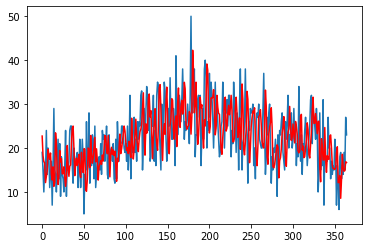

In [15]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(y_to_test.values, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(y_to_test.values)
pyplot.plot(predictions, color='red')
pyplot.show()